In [ ]:
# Name : Dhihan Ahmed, Luke Bianchi, Jacob Gurevich
# Assignment Number & Name : Naive Bayes - NHL Win Classification
# I pledge my honor that I have abided by the Stevens Honor System.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
# Load enhanced dataset
df = pd.read_csv('merged_with_event_features.csv')

# Drop rows with missing values in model features or target
model_features = ['shots', 'hits', 'pim', 'powerPlayGoals', 'faceOffWinPercentage',
                  'giveaways', 'takeaways', 'blocked', 'avg_shot_x', 'avg_shot_y',
                  'num_close_range_shots', 'num_slap_shot', 'num_wrist_shot', 'won']
df = df[model_features].dropna()

# Ensure correct types
df['won'] = df['won'].astype(int)

# Features and target
X = df.drop(columns='won')
y = df['won']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
# Train Decision Tree Classifier
cart = DecisionTreeClassifier(max_depth=4, random_state=42)
cart.fit(X_train, y_train)

# Predict
y_pred = cart.predict(X_test)

In [5]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8617006709571409
Confusion Matrix:
 [[3275  401]
 [ 609 3018]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.87      3676
           1       0.88      0.83      0.86      3627

    accuracy                           0.86      7303
   macro avg       0.86      0.86      0.86      7303
weighted avg       0.86      0.86      0.86      7303



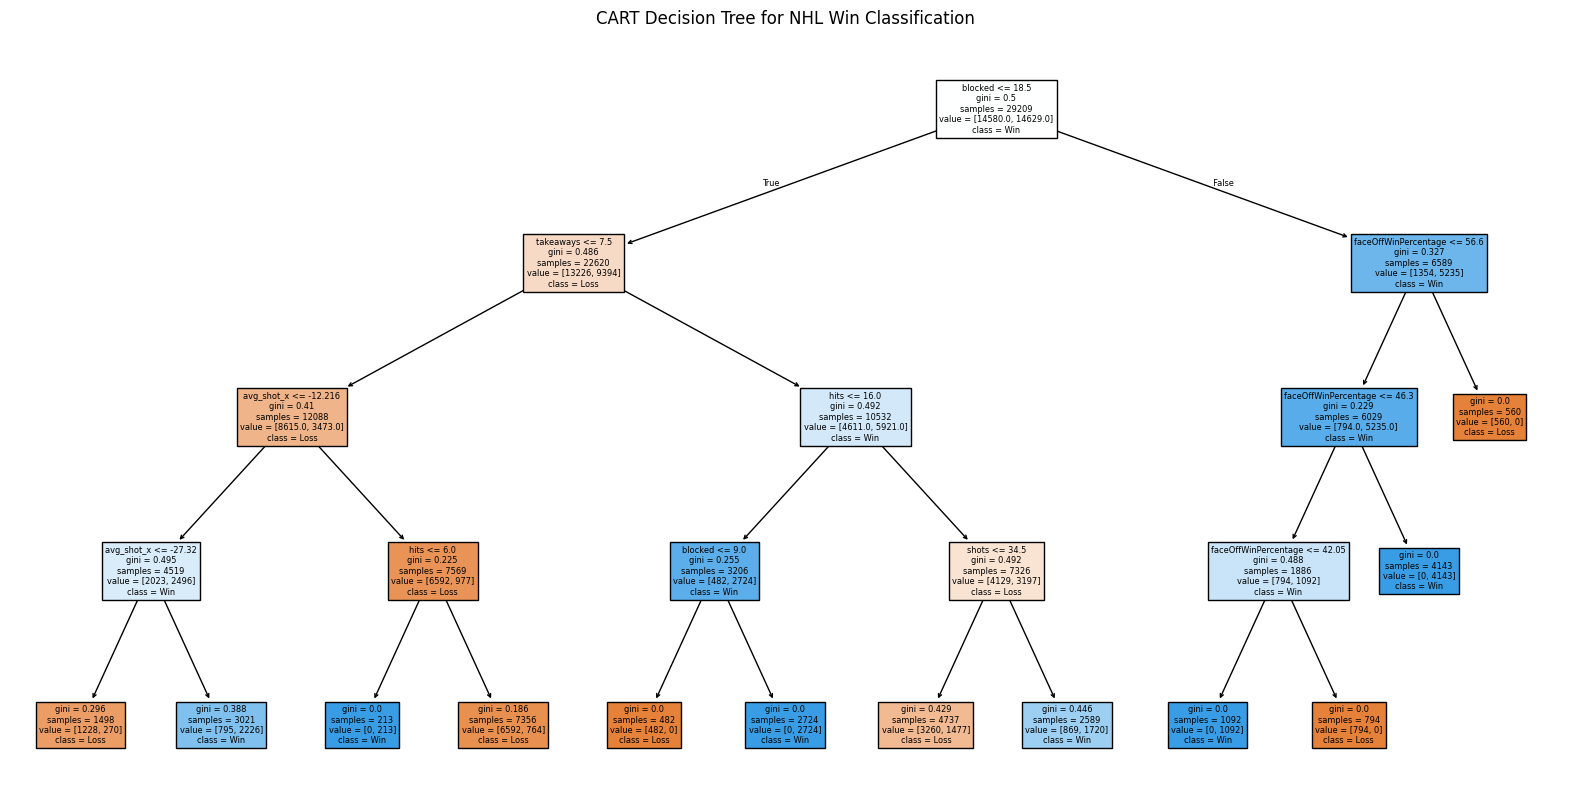

In [6]:
# Visualize the tree
plt.figure(figsize=(20, 10))
plot_tree(cart, feature_names=X.columns, class_names=['Loss', 'Win'], filled=True)
plt.title("CART Decision Tree for NHL Win Classification")
plt.show()